# Summary

Exploratory data analysis of draft data (e.g. win rates)

In [2]:
# Setup Notebook
import os
if os.path.basename(os.getcwd()) != "mtg-modeling":
    get_ipython().run_line_magic("run", '-i "../../scripts/notebook_header.py"')  # type: ignore

Changed working directory to: d:\mtg-modeling


In [3]:
import pandas as pd
from tqdm.notebook import tqdm
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time
import polars as pl

In [4]:
SET_CODE = "BLB"

paths = {
    "processed": Path("data/processed/17lands/game_data/premier_draft"),
}
summary_file = paths["processed"] / f"{SET_CODE}_Game_PD_Summary.parquet"
game_file = paths["processed"] / f"{SET_CODE}_Game_PD_Games.parquet"
draft_file = paths["processed"] / f"{SET_CODE}_Game_PD_Drafts.parquet"
card_file = paths["processed"] / f"{SET_CODE}_Game_PD_Cards.parquet"


# Summary Data

In [5]:
df_summary = pl.scan_parquet(summary_file)
df_summary.collect()

first_game,last_game,max_games,win_rate,start_rate,n_games,n_mul,n_opp_mul,mean_turns,max_turns,min_turns,n_drafts,mean_matches,n_games_per_draft,n_cards,max_card,mean_land,max_land,min_land
str,str,i64,f64,f64,u32,i64,i64,f64,i64,i64,u32,f64,f64,i32,i64,f64,i32,i32
"""2024-07-30 15:41:04""","""2024-08-18 23:59:52""",2,0.547108,0.500285,679966,92172,96719,8.88899,33,1,116804,5.827651,5.821427,276,7,22.164273,37,11


# Draft Data



In [6]:
df_draft = pl.scan_parquet(draft_file)

## Color Decks

C:\Users\Josh.Meehl\AppData\Local\Temp\ipykernel_25920\1397315068.py:1: DeprecationWarning: `LazyGroupBy.count` is deprecated. It has been renamed to `len`.
  colors = df_draft.group_by("main_colors").count().sort(by='count', descending=True).head(10).collect()


<Axes: xlabel='count', ylabel='main_colors'>

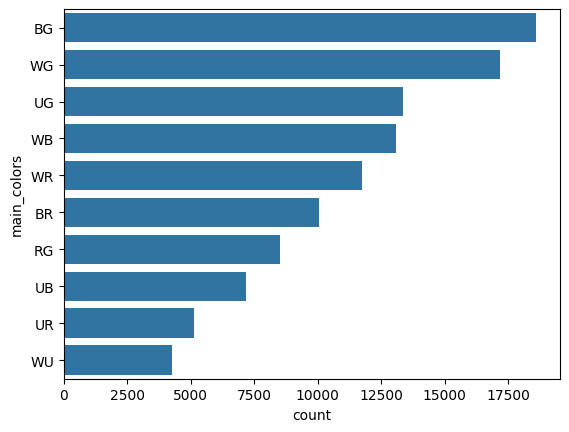

In [10]:
colors = df_draft.group_by("main_colors").count().sort(by='count', descending=True).head(10).collect()
colors = colors.to_pandas()

sns.barplot(data=colors, x="count", y="main_colors")

In [19]:
for color in ['W', 'U', 'B', 'R', 'G']:
    colors[color] = colors['main_colors'].apply(lambda x: True if color in x else False)

for color in ['W', 'U', 'B', 'R', 'G']:
    print(colors[['count', color]].groupby(color).sum())

       count
W           
False  62820
True   46259
       count
U           
False  79189
True   29890
       count
B           
False  60192
True   48887
       count
R           
False  73620
True   35459
       count
G           
False  51416
True   57663


In [10]:
df_draft.group_by("opp_colors").count().sort(by='count', descending=True).head(10).collect()

C:\Users\Josh.Meehl\AppData\Local\Temp\ipykernel_22544\3316925235.py:1: DeprecationWarning: `LazyGroupBy.count` is deprecated. It has been renamed to `len`.
  df_draft.group_by("opp_colors").count().sort(by='count', descending=True).head(10).collect()


opp_colors,count
str,u32
"""WG""",13135
"""WB""",12874
"""BG""",11951
"""WR""",11417
"""UG""",9932
"""BR""",9675
"""RG""",7919
"""UB""",5366
"""UR""",5154


## Player Rank

In [8]:
df_draft.group_by("rank").count().sort(by='count', descending=True).head(10).collect()

C:\Users\Josh.Meehl\AppData\Local\Temp\ipykernel_22544\728000847.py:1: DeprecationWarning: `LazyGroupBy.count` is deprecated. It has been renamed to `len`.
  df_draft.group_by("rank").count().sort(by='count', descending=True).head(10).collect()


rank,count
str,u32
"""platinum""",49053
"""gold""",25872
"""silver""",16999
"""diamond""",13538
"""bronze""",5593
"""mythic""",5474
null,275


In [9]:
df_draft.group_by("opp_rank").count().sort(by='count', descending=True).head(10).collect()

C:\Users\Josh.Meehl\AppData\Local\Temp\ipykernel_22544\3682080557.py:1: DeprecationWarning: `LazyGroupBy.count` is deprecated. It has been renamed to `len`.
  df_draft.group_by("opp_rank").count().sort(by='count', descending=True).head(10).collect()


opp_rank,count
str,u32
"""None""",116804


## Lands

## Mana Curve